In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
from micrograd.value import Value
from micrograd.nn import Neuron, Layer, MLP

In [5]:
np.random.seed(1337)
random.seed(1337)

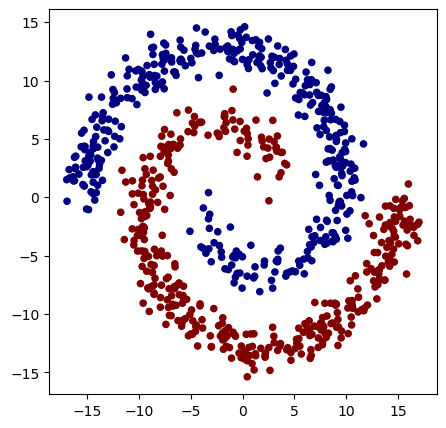

In [17]:
# simulate dataset
from numpy import pi

N = 400
theta = np.sqrt(np.random.rand(N))*2*pi 

r_a = 2*theta + pi
data_a = np.array([np.cos(theta)*r_a, np.sin(theta)*r_a]).T
x_a = data_a + np.random.randn(N,2)

r_b = -2*theta - pi
data_b = np.array([np.cos(theta)*r_b, np.sin(theta)*r_b]).T
x_b = data_b + np.random.randn(N,2)

X = np.vstack([x_a, x_b])
y = np.hstack([np.ones(N), -np.ones(N)])  # labels: +1 and -1

# visualize
plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=y, s=20, cmap='jet')
plt.show()

In [15]:
# initialize a model 
model = MLP(2, [16, 16, 1]) # 2-layer neural network
print(model)

MLP of [Layer of [ReLU Neuron (2), ReLU Neuron (2), ReLU Neuron (2), ReLU Neuron (2), ReLU Neuron (2), ReLU Neuron (2), ReLU Neuron (2), ReLU Neuron (2), ReLU Neuron (2), ReLU Neuron (2), ReLU Neuron (2), ReLU Neuron (2), ReLU Neuron (2), ReLU Neuron (2), ReLU Neuron (2), ReLU Neuron (2)], Layer of [ReLU Neuron (16), ReLU Neuron (16), ReLU Neuron (16), ReLU Neuron (16), ReLU Neuron (16), ReLU Neuron (16), ReLU Neuron (16), ReLU Neuron (16), ReLU Neuron (16), ReLU Neuron (16), ReLU Neuron (16), ReLU Neuron (16), ReLU Neuron (16), ReLU Neuron (16), ReLU Neuron (16), ReLU Neuron (16)], Layer of [ReLU Neuron (16)]]


In [21]:
# loss function
def loss():
    Xb, yb = X, y
    inputs = [list(map(Value, x_row)) for x_row in Xb]
    scores = list(map(model, inputs))

    # hinge loss
    losses = [(1 + -yi*scorei).relu() for yi, scorei in zip(yb, scores)]
    data_loss = sum(losses) * (1.0 / len(losses)) # average with extra steps

    # L2 reg
    alpha = 1e-4
    reg_loss = alpha * sum((p*p for p in model.parameters()))
    total_loss = data_loss + reg_loss

    return total_loss

total_loss = loss()
print(total_loss)

TypeError: 'method' object is not iterable